In [31]:
# Exercise 1.1

def lin_con(seed, M, a, c):

    U_is = []
    x_i = seed
    for i in range(M):
        x_i = (a * x_i + c) % M

        U_is.append(x_i / M)

    return U_is



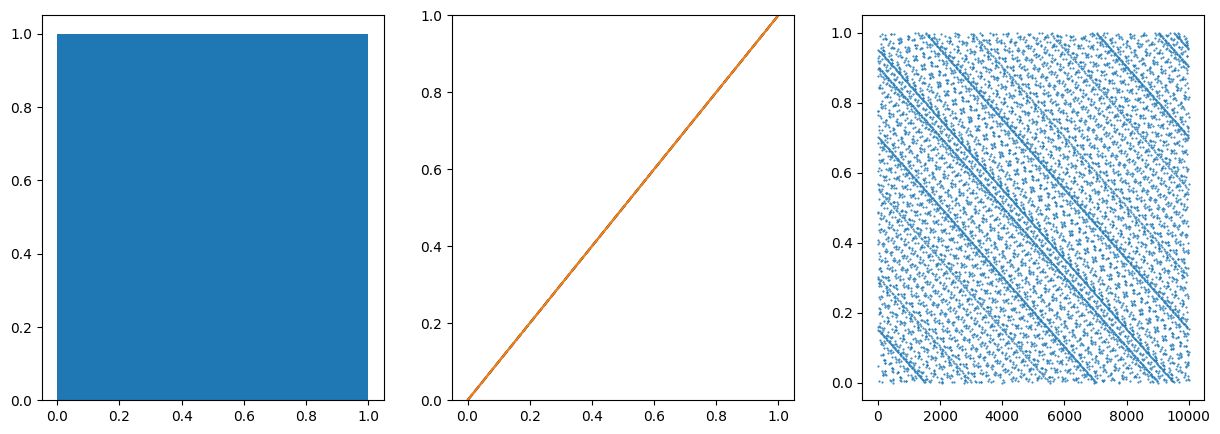

In [32]:
# Exercise 1.2 - Scatter plots
import numpy as np
import matplotlib.pyplot as plt

seed = 69
M = 10000
a = 1664521
c = 102932939

U_is = lin_con(seed, M, a, c)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(U_is, bins=M, density=True)
ax[1].plot(np.sort(U_is), np.linspace(0, 1, len(U_is), endpoint=False))
ax[1].plot((0, 1), (0, 1), 'k--')
ax[1].ecdf(U_is)
ax[2].plot(U_is, '.', markersize=1)

plt.show()




In [33]:
# Exercise 1.2. - Chi-square and Kolmogorov-Smirnov
import scipy.stats as stats
from scipy.stats import kstest, chisquare

# K-S test:
kstest_stat = kstest(U_is, stats.uniform.rvs, alternative='two-sided')



# Define the bin edges
bin_edges = np.linspace(0, 1, 11)

# Use numpy's histogram function to count the number of values in each bin
counts, _ = np.histogram(U_is, bins=bin_edges)
counts_expected = [1000] * 10

chisquare_stat = chisquare(counts, counts_expected) # Don't need to give it expected, if none given, expects uniform distribution

print(kstest_stat)
print(chisquare_stat)

KstestResult(statistic=0.9999147592479632, pvalue=0.0, statistic_location=0.6256, statistic_sign=-1)
Power_divergenceResult(statistic=0.004, pvalue=0.9999999999999863)


In [34]:
# Exercise 1.3
from scipy.stats import uniform

r = uniform.rvs(size=10000)

# K-S test:
kstest_stat = kstest(r, stats.uniform.rvs, alternative='two-sided')

# Define the bin edges
bin_edges = np.linspace(0, 1, 11)

# Use numpy's histogram function to count the number of values in each bin
counts_r, _ = np.histogram(r, bins=bin_edges)
counts_expected = [1000] * 10

chisquare_stat = chisquare(counts_r, counts_expected) # Don't need to give it expected, if none given, expects uniform distribution

print(kstest_stat)
print(chisquare_stat)

KstestResult(statistic=1.0047712250423881, pvalue=0.0, statistic_location=0.8177735352094818, statistic_sign=-1)
Power_divergenceResult(statistic=7.046, pvalue=0.6323300177806706)


# Exercise 1.4

Having only one sample might give problems, since we do not know if the cycles are significantly worse (shorter) for other samples. Optimally we would need to test for many different input parameters


In [35]:
# Run test 1 - Wald-Wolfowitz - TODO: REMOVE THOSE EQUAL TO THE MEDIAN
import scipy.stats

# Get runs above or below

def get_run_lengths(numbers):

    median = sorted(numbers)[int(len(numbers)/2)]

    aboves = 0
    belows = 0

    above_run = 0
    below_run = 0

    for U_i in numbers:

        if U_i > median:
            if above_run > 0:
                aboves += 1
                above_run = 0

            below_run += 1
            

        elif U_i < median:
            if below_run > 0:
                belows += 1
                below_run = 0
                
            above_run += 1
            
            
    aboves += 1 * (above_run > 0)
    belows += 1 * (below_run > 0)        

    return aboves, belows

aboves, belows = get_run_lengths(U_is)

median = sorted(U_is)[int(len(U_is)/2)]

n1 = sum([i > median for i in U_is])
n2 = sum([i < median for i in U_is])


mean_expected_runs = 2 * ((n1*n2)/(n1+n2))  + 1
std_expected_runs = 2 * (((n1*n2)*(2*n1*n2 - n1 - n2))/((n1 + n2)**2*(n1+n2-1)))

print(mean_expected_runs, std_expected_runs)

p_value = 2 * (1 - scipy.stats.norm.cdf(aboves + belows, loc=mean_expected_runs, scale=std_expected_runs))

print(aboves, belows)
print(p_value)

5000.499949995 2499.499924989999
2502 2501
0.9992019399770025


In [36]:
import numpy as np

A = np.array(
            [[ 4529.4,  9044.9, 13568,  18091,  22615,  27892],
            [ 9044.9, 18097.0, 27139,  36187,  45234,  55789],
            [13568.0, 27139.0, 40721,  54281,  67852,  83685],
            [18091.0, 36187.0, 54281,  72414,  90470, 111580],
            [22615.0, 45234.0, 67852,  90470, 113262, 139476],
            [27892.0, 55789.0, 83685, 111580, 139476, 172860]])

B = np.array([[1/6, 5/24, 11/120, 19/720, 29/5040, 1/840]]).T


def up_down_counter(numbers):
    num_of_length = [0] * 6
    len_increasing = 0
    
    for i in range(1, len(numbers)):
        if numbers[i] > numbers[i-1]:
            len_increasing += 1
        
        else:
            if len_increasing < 6:
                num_of_length[len_increasing] += 1
            else:
                num_of_length[-1] += 1
            len_increasing = 0
    
    if len_increasing > 0:
        if len_increasing < 6:
            num_of_length[len_increasing] += 1
        else:
            num_of_length[-1] += 1

    return num_of_length



import random

n = 10000


U_is = lin_con(seed, M=n, a=a, c=c)
# U_is_2 = scipy.stats.uniform.rvs(size=n)
U_is_2 = np.random.rand(n)


R = np.array([up_down_counter(U_is)]).T
R_2 = np.array([up_down_counter(U_is_2)]).T


Z = 1/(n-6) * (R - n*B).T @ A @ (R - n*B)

Z_2 = 1/(n-6) * (R_2 - n*B).T @ A @ (R_2 - n*B)

print(R)
print(R_2)

print(Z)
print(Z_2)

p_value = 1 - scipy.stats.chi2.cdf(Z, 6)
p_value_2 = 1 - scipy.stats.chi2.cdf(Z_2, 6)

print(p_value)
print(p_value_2)

[[1668]
 [2071]
 [ 945]
 [ 230]
 [  76]
 [   9]]
[[1619]
 [2017]
 [ 951]
 [ 279]
 [  61]
 [  12]]
[[12.17823715]]
[[6.3647084]]
[[0.05810864]]
[[0.38359864]]


In [55]:
def count_up_and_down(numbers):
    num_of_length = [0] * 3
    len_run = 0

    run_increasing = True
    run_decreasing = True

    for i in range(1, len(numbers)):
        if (numbers[i] > numbers[i-1] and run_increasing):
            len_run += 1
            print('here', numbers[i], len_run)
            run_decreasing = False

        elif (numbers[i] < numbers[i-1] and run_decreasing):
            len_run += 1
            print('here', numbers[i])
            run_increasing = False

        else:
            run_increasing = not run_increasing
            run_decreasing = not run_decreasing
            if len_run < 3:
                num_of_length[len_run] += 1
            else:
                num_of_length[-1] += 1

            # print(numbers[i])
            print(len_run)

            len_run = 0
            
    # Hvad sker der når man når til den sidste?
    # Det er på den første at den fejler

    return num_of_length

def count_up_and_down(numbers, v=False):
    num_runs = 0
    len_run = 0
    decreasing = False
    increasing = False
    len_run = 0
    for i in range(1, len(numbers)):
        if numbers[i] > numbers[i - 1]:

            if decreasing:
                decreasing = False
                num_runs += 1

                if v:
                    print(len_run)
                len_run = 0

            len_run += 1
            increasing = True

        elif numbers[i] < numbers[i - 1]:

            if increasing:
                increasing = False
                num_runs += 1

                if v:
                    print(len_run)

                len_run = 0

            len_run += 1
            decreasing = True
    
    if not (numbers[i] < numbers[i - 1] and increasing) or not (numbers[i] > numbers[i - 1] and decreasing):
        num_runs += 1

    return num_runs
        

def count_up_down(sequence, v=True):
    import itertools
    higher_than = [sequence[i] > sequence[i-1] for i in range(1, len(sequence))]

    run_lens = []
    for _, iter in itertools.groupby(higher_than):
        run_lens.append((len(list(iter))))

    if v:
        print(higher_than)
        print(run_lens)
        
    return len(run_lens)

sequence = [0.54, 0.67, 0.13, 0.89, 0.33, 0.45, 0.90, 0.01, 0.45, 0.76, 0.82, 0.24, 0.17]

count_up_down(sequence)

print(count_up_and_down(sequence, v=True))

n = 10000
U_is_2 = np.random.rand(n)

X = count_up_and_down(U_is_2)

Z = (X - ((2*n-1)/3))/np.sqrt((16 * n - 29)/90)  

print(Z)
print(1 - 2*scipy.stats.norm.cdf(Z))

[True, False, True, False, True, True, False, True, True, True, False, False]
[1, 1, 1, 1, 2, 1, 3, 2]
1
1
1
1
2
1
3
8
1.2729321229191193
-0.7969578708170504


[0, 0, 8]
